# Анализ рынка продаж компьютерных игр

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Подготовка данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проблемы:
- некорректный тип столбца `user_score`, `year_of_release`
- названия столбцов в смешаннном регистре

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.year_of_release = df.year_of_release.astype('Int64')

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

В оценке игроков встречается значение `tbd` - to be done. Исправим, поменяв на Nan - для нас обещание оценки не отличается от ее отсутствия

In [9]:
df['user_score'] = df['user_score'].replace('tbd', None)

In [10]:
df['user_score'] = df['user_score'].astype('float')

Посмотрим на оценки критиков

In [11]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Оценки инроков лежат в диапазоне 0-10, а критиков 0-100. Поправим

In [12]:
df['critic_score'] =df['critic_score']/10

Все хорошо, продолжаем

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Посмотрим что присходит с именами игр

Приведем все имена к нижнему регистру

In [14]:
df.name = df['name'].str.lower()

In [15]:
df['name'].isna().value_counts()

False    16713
True         2
Name: name, dtype: int64

Игры без имени - что-то странное, тем более их всего две - уберем

In [16]:
df.dropna(subset=['name', ], inplace=True)

Теперь у всех игр есть имя, ура!
Посмотрим на рейтинг:

In [17]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

C рейтингом следующая проблема:

Рейтинг ESRB:

- E - Everyone
- M - Mature
- T - Teen
- E10+ - Everyone 10+
- K-A - Everyone
- AO - Adults Only 18+
- EC - Early Childhood
- RP - Rating Pending

То есть E и K-A означают одно и то же. Первое обозначение использовалось до 1998 года, второе после, но смысл один.
Поправим.

In [18]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Игры иногда выходят без рейтинга ESRB, он является добровольным. Заменим пропуски явным указанием на отсутствие рейтинга

In [20]:
df.loc[df['rating'].isna(), 'rating'] = 'None'

In [21]:
df.isnull().sum().sort_values(ascending = False)

critic_score       8576
user_score         7953
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

У нас есть пропущенные знчения в `critic_score`, `user_score`, `rating`, `year_of_release`
- `critic_score`, `user_score` не трогаем, любое заполнение исказит дальнейшие оценки
- `year_of_release` не трогаем, так как у нас нет никаких инструментов чтобы определить год выпуска без испольщования внешних данных

Посчитаем суммарные продажи

In [23]:
df['sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           16713 non-null  object 
 11  sales            16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


In [26]:
df.duplicated(['name', 'platform', 'year_of_release', ]).sum()

1

Ура, дубликат нашелся! Посмотрим на него.

In [27]:
df[df.duplicated(['name', 'platform', 'year_of_release', ])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16230,madden nfl 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,8.3,5.5,E,0.01


In [28]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release', ], inplace=True)

## Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [29]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

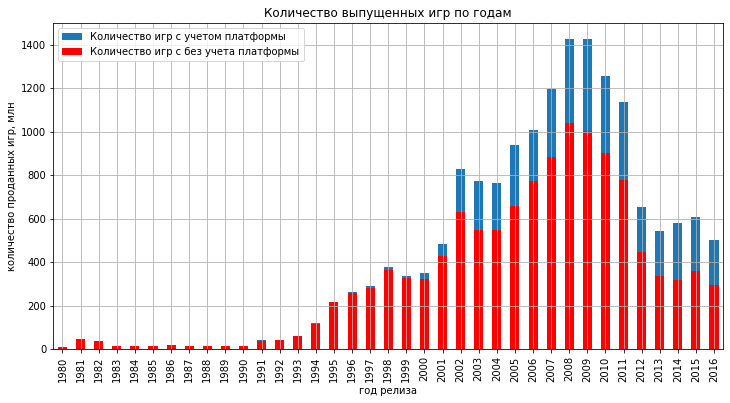

In [30]:
df.groupby('year_of_release')['name'].count().plot(kind='bar',  grid=True, figsize=(12,6), legend=True)
df.groupby('year_of_release')['name'].nunique().plot(kind='bar',  grid=True, figsize=(12,6), legend=True, color='r')
plt.legend(['Количество игр с учетом платформы', 'Количество игр с без учета платформы'])
plt.xlabel('год релиза')
plt.ylabel('количество проданных игр, млн')
plt.title('Количество выпущенных игр по годам')
plt.show()

Сокращение количества игр можно объяснить следующими факторами:
- возросшей стоимостью разработки игр и как следствие политикой издательств в стиле меньше но дороже
- большинство геймеров уже имело в своём распоряжении ту или иную игровую приставку, и накопленную и не пройдённую библиотеку игр. 
- ну и состояние экономики, конечно)


In [31]:
vc = pd.DataFrame(df.groupby('platform')['sales'].sum().sort_values(ascending = False))
vc['persent'] = vc['sales']/vc['sales'].sum()*100
vc

,sales,persent
platform,,
PS2,1255.77,14.088753
X360,971.42,10.898569
PS3,939.64,10.542023
Wii,907.51,10.181549
DS,806.12,9.044033
PS,730.86,8.199675
GBA,317.85,3.566027
PS4,314.14,3.524404
PSP,294.05,3.299010


Посмотрим на платформы которые генерили больше 1 и больше 5 процентов объема рынка (миллионах проданных копий) соответственно

In [32]:
platform_names_more_5 = list(vc[vc['persent']>5].index)
platform_names_more_1 = list(vc[vc['persent']>1].index)

In [33]:
test = df.groupby(by=['platform', 'year_of_release'])['sales'].sum()
utets = test.unstack(level=0)

Посмотрим на платформы которые заняли не менее 1% от общего количества и на те, которые заработали не менее 5%

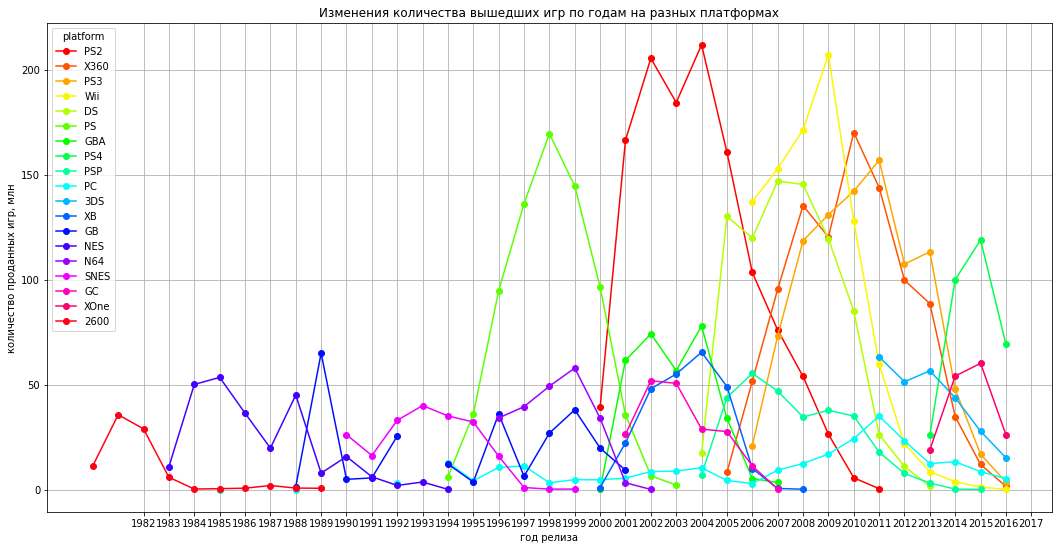

In [34]:
utets[platform_names_more_1].plot(kind='line', grid=True, figsize=(18,9), style=['o-']*len(platform_names_more_1), xticks=range(1982, 2018,1), colormap='hsv')
plt.xlabel('год релиза')
plt.ylabel('количество проданных игр, млн')
plt.title('Изменения количества вышедших игр по годам на разных платформах')
plt.show()

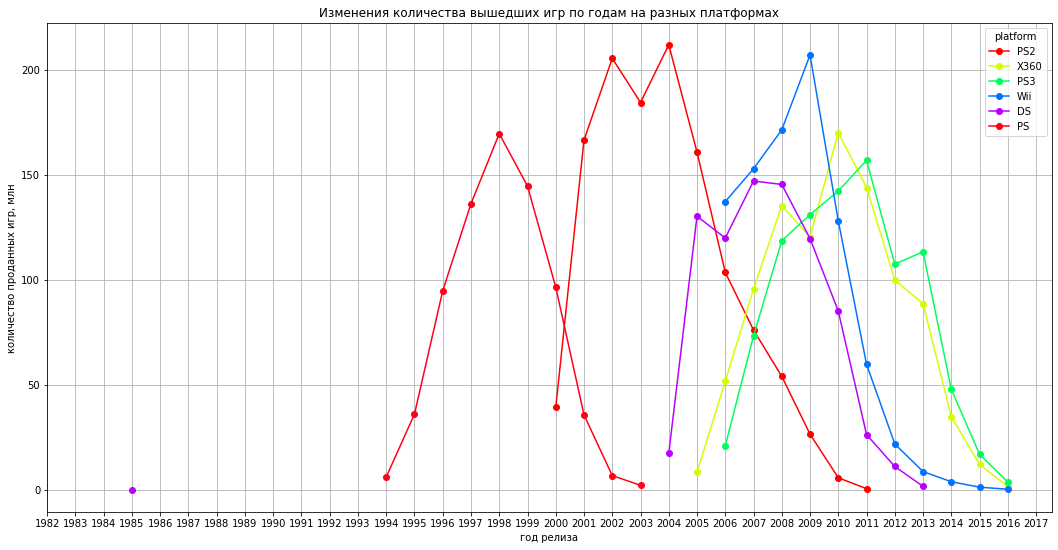

In [35]:
utets[platform_names_more_5].plot(kind='line', grid=True, figsize=(18,9), style=['o-']*len(platform_names_more_5), xticks=range(1982, 2018,1), colormap='hsv')
plt.xlabel('год релиза')
plt.ylabel('количество проданных игр, млн')
plt.title('Изменения количества вышедших игр по годам на разных платформах')
plt.show()

На втором графике видны более крупные игроки, на первом лучше видна динамика жизненного цикла
В среднем, ранние (1980-2000) платформы уходят с рынка за 7-8 лет (NES, SNES) или меньше, более современные держаться дольше 8-10, что логично - у них больший технологический запас


Действительно, это ошибка в данных. Nintendo DS вышла в 2004 году, игра для нее в 1985 вряд ли могла выйти.

(В этой работе я не учитываю временные парадоксы вызванные метаниями очередного путешественника во времени по мультивселенной) 

Посмотрим на запись:

In [36]:
df[(df['platform'] == 'DS')&(df['year_of_release'] <2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15957,strongest tokyo university shogi ds,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,None,0.02


Если верить [vgchartz](https://www.vgchartz.com/game/4399/strongest-tokyo-university-shogi-ds/), то эта игра была выпущена в 7 мая 2010 года. Поправи данные и перeстроим график:

In [37]:
df.loc[df['name'] == 'strongest tokyo university shogi ds', 'year_of_release'] = 2010

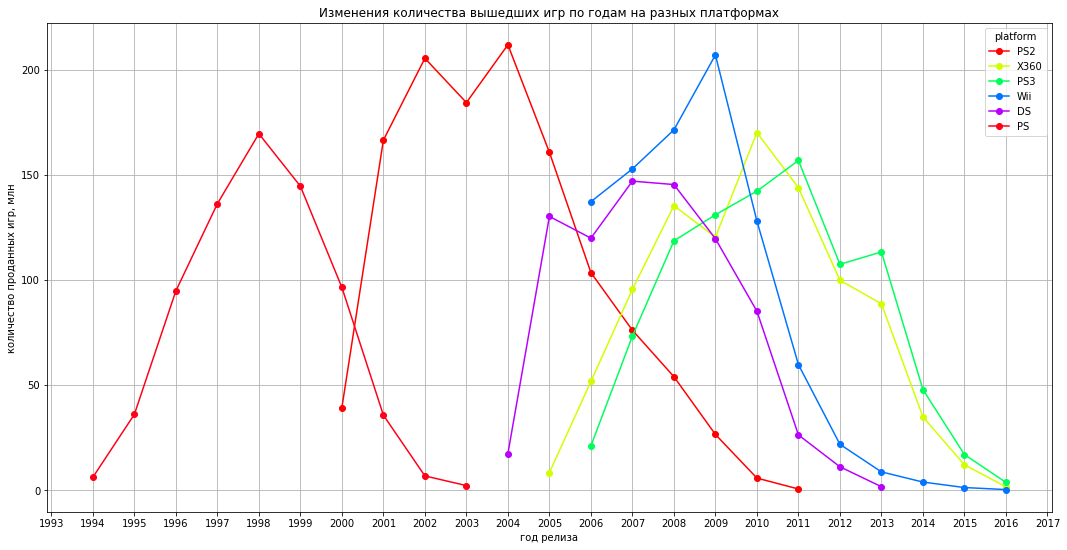

In [38]:
test = df.groupby(by=['platform', 'year_of_release'])['sales'].sum()
utets = test.unstack(level=0)
utets[platform_names_more_5].plot(kind='line', grid=True, figsize=(18,9), style=['o-']*len(platform_names_more_5), xticks=range(1993, 2018,1), colormap='hsv', title='Изменение выручки по годам')
plt.xlabel('год релиза')
plt.ylabel('количество проданных игр, млн')
plt.title('Изменения количества вышедших игр по годам на разных платформах')
plt.show()
plt.show()

Ура, ошибка временного континуума восстановлена и [Управление временными изменениями](https://ru.wikipedia.org/wiki/Локи_(сериал)) за нами не придет))

## Выбор временного периода  для исследования

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.



Возьмем переиод начиная с 2012 - на нем начинает прослеживаться тендеция к падению количества проданных копий в индустрии.

In [39]:
df_new = df[df['year_of_release']>=2012]
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,None,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.3,5.3,M,13.79


In [40]:
vc1 = pd.DataFrame(df_new.groupby('platform')['sales'].sum().sort_values(ascending = False))
vc1['persent'] = vc1['sales']/vc1['sales'].sum()*100
vc1

,sales,persent
platform,,
PS4,314.14,21.716948
PS3,288.78,19.963775
X360,236.54,16.352349
3DS,194.61,13.453668
XOne,159.32,11.014020
WiiU,82.19,5.681912
PC,62.65,4.331084
PSV,49.18,3.399884
Wii,35.37,2.445179


По количеству проданных игр (в штуках) за этот период лидируют `PS3`, `X360`, `PS4` и `3DS` - вместе они собрали больше половины рынка, что в общем не удивитльно. `PS3` и `X360` давно на рынке и успели обрасти клиенской базой и огромным каталогом игр. `PS4` не так давно успешно стартовала, кроме этого игры у нее намного дороже, что так же положительно влияет на выручку. У `3DS` в [2012 году рост продаж консоли](https://www.statista.com/statistics/262074/worldwide-sales-of-the-nintendo-3ds-since-2004/), так что количество проданых копии игр значительно. Возьмем также `PC` - это крайне спецефичная `консоль` с бесконечным жизненым циклом)

In [41]:
test2 = df_new.groupby(by=['platform', 'year_of_release'])['sales'].sum()
utets2 = test2.unstack(level=0)[['PS4', 'PS3', 'X360', '3DS', 'PC']]

In [42]:
utets2.head()

platform,PS4,PS3,X360,3DS,PC
year_of_release,,,,,
2012,NaN,107.35,99.74,51.36,23.22
2013,25.99,113.25,88.58,56.57,12.38
2014,100.00,47.76,34.74,43.76,13.28
2015,118.90,16.82,11.96,27.78,8.52
2016,69.25,3.60,1.52,15.14,5.25


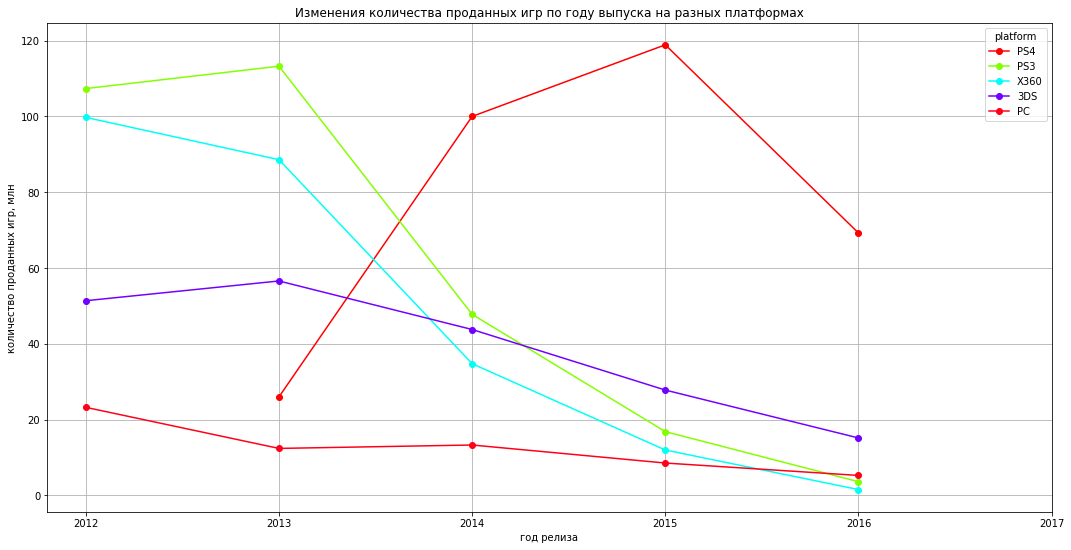

In [43]:
utets2.plot(
    kind='line', 
    grid=True, 
    figsize=(18,9), 
    style=['o-']*5, 
    xticks=range(2012, 2018,1), 
    colormap='hsv'
)


plt.xlabel('год релиза')
plt.ylabel('количество проданных игр, млн')
plt.title('Изменения количества проданных игр по году выпуска на разных платформах')
plt.show()


Все платформы кроме PS4 и XOne демонстрируют строгое убывание, хотя возможно продажи вырастут в дальнейшем. У PS4, XOne демонстрируется некоторый спад в районе 2016 - волна энтузиазма и новых релизов прошла, но но глядя на анологичные графики для PS4 и XOne  можно утверждать, что количество пользователей у У PS4 и XOne растет, и если все сложится удачно, то выручка тоже может вырасти. 

У `3DS` наблюдается медленный спад - запуск консоли сопровождался проблемами и был не очень удачен, насколько я смог разобраться. Хотя опять же, возможно со временм продадуться больше копий


У `PC` график убывает, но на компьютере игры продаются еще долго после релиза и тогда график поползет вверх)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера  ✔️</h2>
    
Соглашусь. Хотя 3DS я бы тоже взяла, ведь на момент выгрузки у нее все еще большие объемы:

</div>

In [44]:
# КОД РЕВЬЮЕРА

df_new.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').loc[[2015, 2016]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

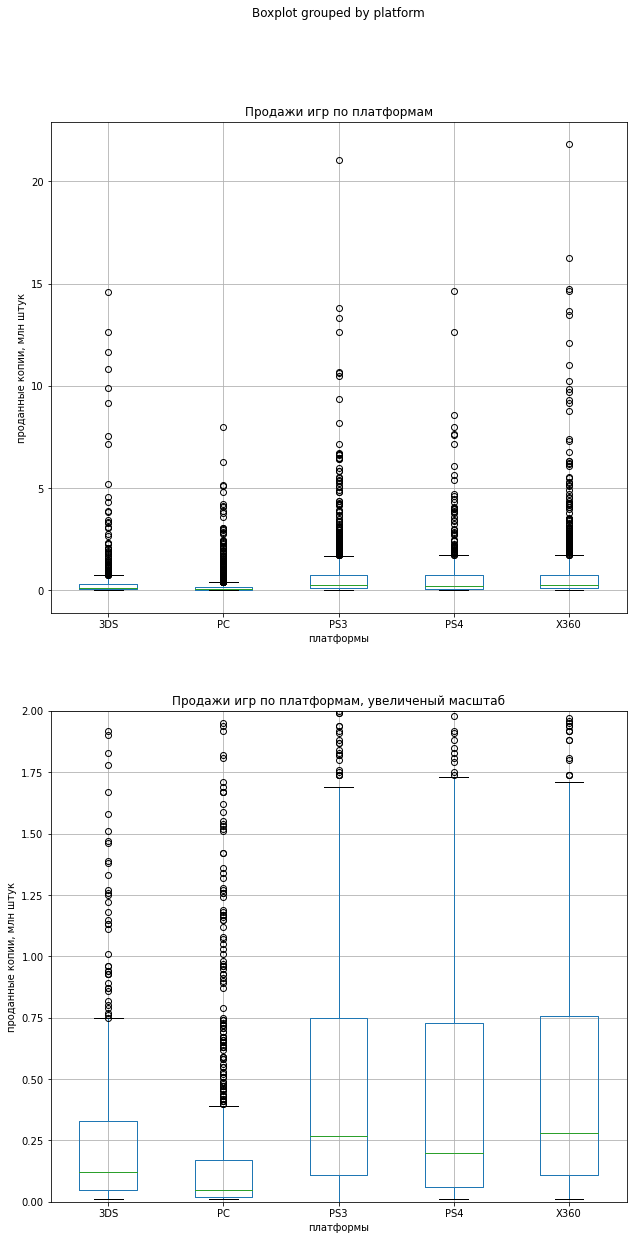

In [45]:
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize=(10, 20), )


df_platform_sales = df[df.platform.isin(['PS4', 'PS3', 'X360', '3DS', 'PC'])][['platform', 'sales']]


df_platform_sales.boxplot(
    by='platform',
    #title= 'Изменения количества проданных игр по году выпуска на разных платформах',
    ax=ax[0])


df_platform_sales.boxplot(
    by='platform', 
    ax=ax[1],
    #title= 'Изменения количества проданных игр по году выпуска на разных платформах крупно'
).set_ylim(0, 2)


ax[0].set(
    title='Продажи игр по платформам', 
    ylabel='проданные копии, млн штук', 
    xlabel='платформы'
)
ax[1].set(
    title='Продажи игр по платформам, увеличеный масштаб', 
    ylabel='проданные копии, млн штук', 
    xlabel='платформы'
)

plt.show()



Посмотрим на результат.

Можно увидеть, что медианный объем продаж одной игры крайне скромен у всех платформ и не превышает 0.3 миллиона штук на игру. 

Вместе с тем на графиках присутствует значительное количество выбросов - это случаи когда продажи особо успешных игр на порядок превышает медианные значения и достигает 3-20 миллионов штук.

Если не рассчитывать на выдающийся успех, то наиболее перспективными выглядят `PS3`, `X360` и  `PS4` - у них максимальный межквартильный размах и высокое значение медианы


### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Возтмем для примера PS4. Нам важно что она самая новая из успешных, соответственно на ней выходит большинство новинок, и большинство новых отзывов. За последнее время динамика формирования общественного мнения сильно эволюционировала

In [46]:
df_ps4  = df_new[df_new['platform'] == 'PS4']

In [47]:
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,None,7.98
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,8.3,5.7,M,7.66


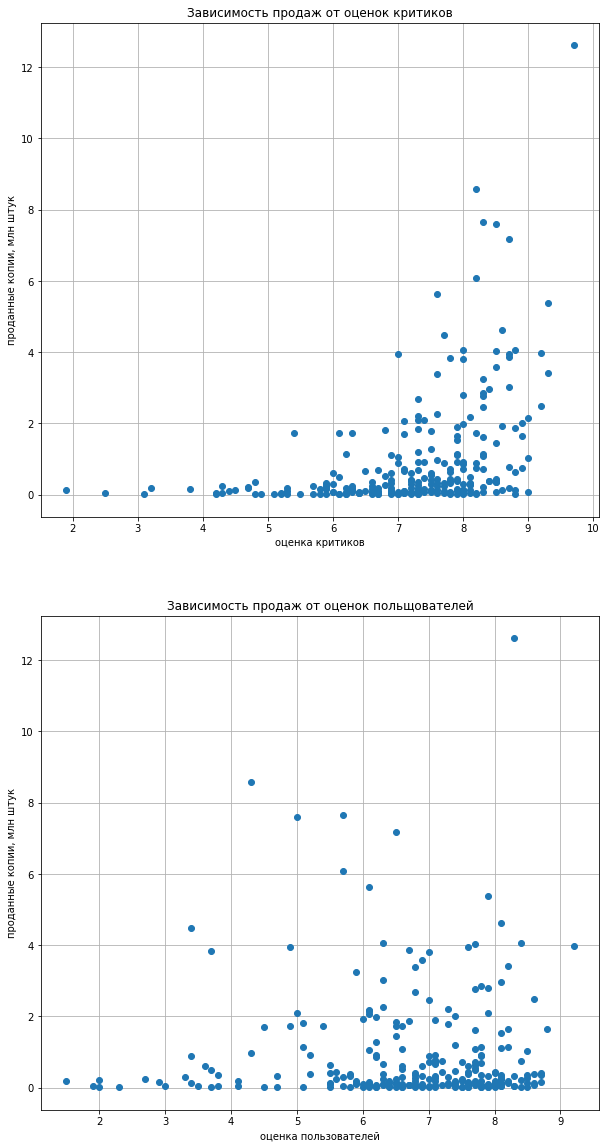

In [48]:
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize=(10, 20), )


ax[0].plot(df_ps4['critic_score'], df_ps4['sales'], 'o')
ax[1].plot(df_ps4['user_score'], df_ps4['sales'], 'o')


ax[0].set(
    title='Зависимость продаж от оценок критиков', 
    ylabel='проданные копии, млн штук', 
    xlabel='оценка критиков',
)
ax[1].set(
    title='Зависимость продаж от оценок польщователей', 
    ylabel='проданные копии, млн штук', 
    xlabel='оценка пользователей'
)
ax[0].grid()
ax[1].grid()
plt.show()

Большинство оценок критиков лежит в интервале 6-8.5. Можно сказать, что у игр лежащих в этом диапазоне более высокие шансы продать большее количество копий. Но хорошо наблюдаемой корреляции между продажами и ревью нет.

У пользователей разброс оценок шире, большинство лежит в интервале 5.5-9. Пользователи более склонны ниже оценивать проекты с большим количеством продпнных копий.

Посмотрим на игры в топе

In [49]:
df_ps4[(df_ps4['critic_score']>9.0)|(df_ps4['user_score']>9.0)][['name', 'sales', 'critic_score', 'user_score']]

,name,sales,critic_score,user_score
42,grand theft auto v,12.62,9.7,8.3
171,uncharted 4: a thief's end,5.39,9.3,7.9
303,the witcher 3: wild hunt,3.97,9.2,9.2
390,metal gear solid v: the phantom pain,3.42,9.3,8.2
623,bloodborne,2.48,9.2,8.6


Ну в общем ничего удливительного)

In [50]:
critic_on_sales = df_ps4[['critic_score', 'sales']].corr()
critic_on_sales*100

,critic_score,sales
critic_score,100.00000,40.65679
sales,40.65679,100.00000


In [51]:
user_on_sales = df_ps4[['user_score', 'sales']].corr()
user_on_sales*100

,user_score,sales
user_score,100.000000,-2.742785
sales,-2.742785,100.000000


Сборы и оценки критиков не связанны, сборы и оценки пользователей в принципе не сязанны.
Это более чем закономерно - пользователи очень любят маленькие инди-проекты с нишевой аудиторией, и скептически отностятся к высокобюджетным проектам.

Критики, в свою очередь, пишут рецензии за 5-20 часов знакомства с игрой, и в высоко ценят графику -- что ведет к некоторой корреляции с бюджетом

С другой стороны, то что критик пишет рецензию означает наличие рекламного бюжета.

Критик пишет заранее, пока проблемы не вылезли у опытних пользователей.


In [52]:
df_ps4[['name','user_score', 'critic_score','sales']].sort_values(by='sales', ascending=False)

,name,user_score,critic_score,sales
31,call of duty: black ops 3,NaN,NaN,14.63
42,grand theft auto v,8.3,9.7,12.62
77,fifa 16,4.3,8.2,8.58
87,star wars battlefront (2015),NaN,NaN,7.98
92,call of duty: advanced warfare,5.7,8.3,7.66
...,...,...,...,...
15943,professional farmer 2016,NaN,NaN,0.01
15864,rocksmith 2014 edition remastered,7.8,NaN,0.01
15839,mark mcmorris infinite air,6.0,4.9,0.01
15790,this war of mine,NaN,NaN,0.01


### Соотнесите выводы с продажами игр на других платформах

Посмотрим на другие платформы

In [53]:
df_xbox360  = df[(df['year_of_release']>=2011) & (df['platform'] == 'X360')]
critic_on_sales = df_xbox360[['critic_score', 'sales', 'user_score']].corr()*100
critic_on_sales.head()

,critic_score,sales,user_score
critic_score,100.000000,39.125332,56.838593
sales,39.125332,100.000000,3.574576
user_score,56.838593,3.574576,100.000000


In [54]:
df_ps3 = df[(df['year_of_release']>=2011) & (df['platform'] == 'PS3')]
critic_on_sales = df_ps3[['critic_score', 'sales', 'user_score']].corr()*100
critic_on_sales.head()

,critic_score,sales,user_score
critic_score,100.000000,38.199143,56.486072
sales,38.199143,100.000000,1.337125
user_score,56.486072,1.337125,100.000000


In [55]:
df_pc = df[(df['year_of_release']>=2011) & (df['platform'] == 'PC')]
critic_on_sales = df_pc[['critic_score', 'sales', 'user_score']].corr()*100
critic_on_sales.head()

,critic_score,sales,user_score
critic_score,100.000000,31.418474,46.481543
sales,31.418474,100.000000,-5.300186
user_score,46.481543,-5.300186,100.000000


С массовыми платформами все понятно посмотрим на менее массовые:

In [56]:
df_ds = df[(df['year_of_release']>=2011) & (df['platform'] == 'DS')]
critic_on_sales = df_ds[['critic_score', 'sales', 'user_score']].corr()*100
critic_on_sales.head()

,critic_score,sales,user_score
critic_score,100.000000,26.116586,21.891882
sales,26.116586,100.000000,9.373077
user_score,21.891882,9.373077,100.000000


In [57]:
df_wii = df[(df['year_of_release']>=2011) & (df['platform'] == 'Wii')]
critic_on_sales = df_wii[['critic_score', 'sales', 'user_score']].corr()*100
critic_on_sales.head()

,critic_score,sales,user_score
critic_score,100.00000,29.226950,38.459420
sales,29.22695,100.000000,3.156841
user_score,38.45942,3.156841,100.000000


С маленькими платформами все по другому, меньше аудитория, камерней атмрсфера, нет токсичности, массовых флешмобов по сливу оценок, и так далее)
Аудитория менее фрагментирована

Появляется взаимосвязь между продажами и оценками

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

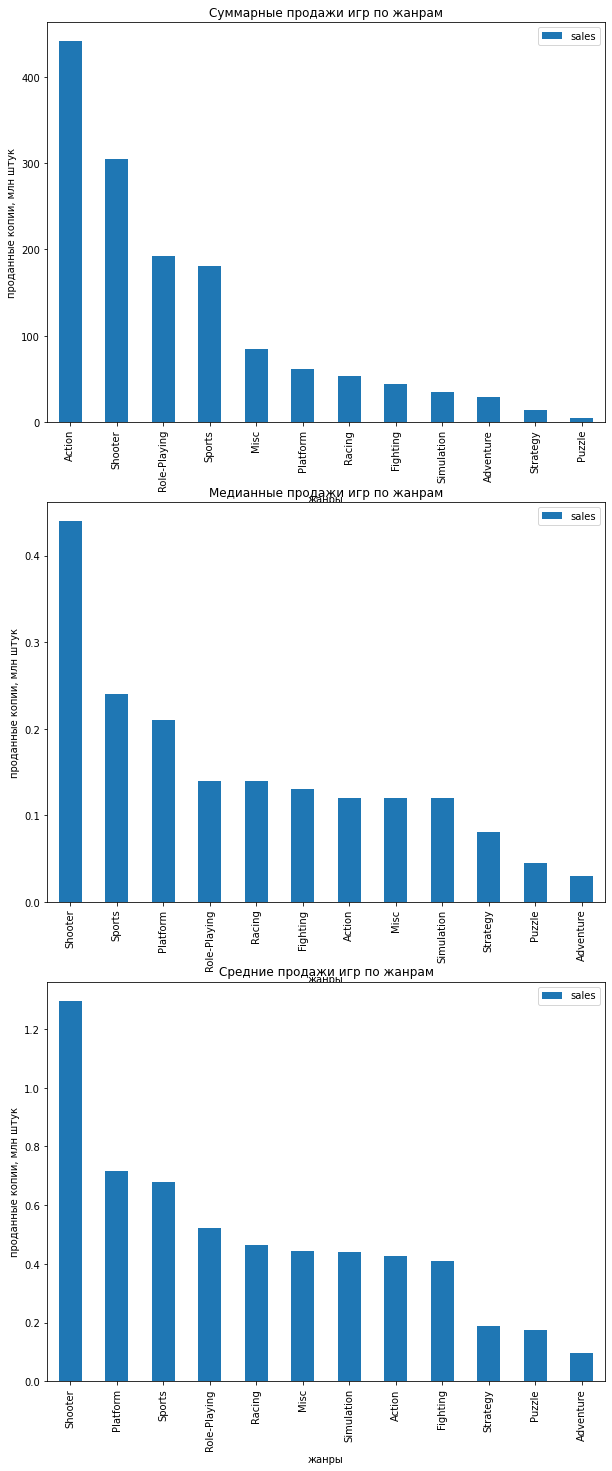

In [58]:
fig, ax = plt.subplots(nrows = 3, ncols =1, figsize=(10, 25), )

grouped = df_new.groupby(by='genre')

grouped.agg({'sales':'sum'}).sort_values(by='sales', ascending=False).plot(kind='bar', ax=ax[0])

grouped.agg({'sales':'median'}).sort_values(by='sales', ascending=False).plot(kind='bar', ax=ax[1])

grouped.agg({'sales':'mean'}).sort_values(by='sales', ascending=False).plot(kind='bar', ax=ax[2])

ax[0].set(
    title='Суммарные продажи игр по жанрам', 
    ylabel='проданные копии, млн штук', 
    xlabel='жанры'
)
ax[1].set(
    title='Медианные продажи игр по жанрам', 
    ylabel='проданные копии, млн штук', 
    xlabel='жанры'
)


ax[2].set(
    title='Средние продажи игр по жанрам', 
    ylabel='проданные копии, млн штук', 
    xlabel='жанры'
)


plt.show()

In [59]:
table = grouped.agg({'sales':['count', 'sum', 'median', 'mean']})#.sort_values(by='sales', ascending=False)\
table.columns = ['count_of_games', 'sum', 'median_per_game', 'mean_per_game']
table.sort_values(by='mean_per_game', ascending=False)

,count_of_games,sum,median_per_game,mean_per_game
genre,,,,
Shooter,235,304.73,0.440,1.296723
Platform,85,61.00,0.210,0.717647
Sports,267,181.06,0.240,0.678127
Role-Playing,370,192.80,0.140,0.521081
Racing,115,53.50,0.140,0.465217
Misc,192,85.04,0.120,0.442917
Simulation,80,35.12,0.120,0.439000
Action,1031,441.12,0.120,0.427856
Fighting,109,44.49,0.130,0.408165


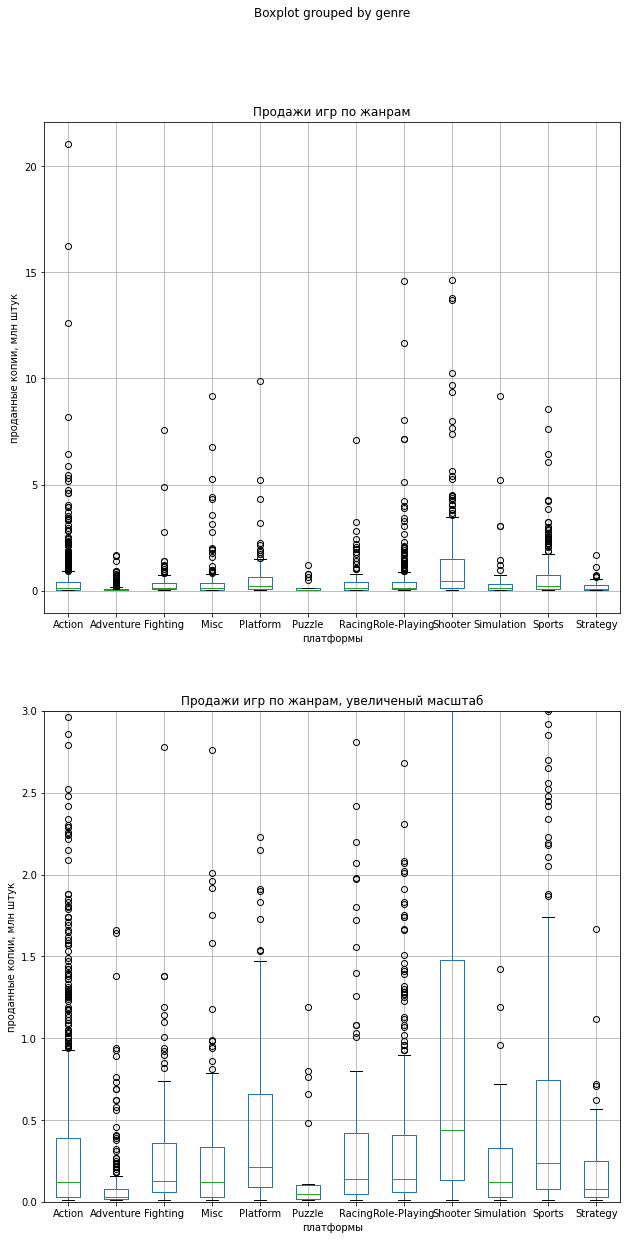

In [60]:
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize=(10, 20), )


df_genre_sales = df_new[['genre', 'sales']]


df_genre_sales.boxplot(
    by='genre',
    ax=ax[0])


df_genre_sales.boxplot(
    by='genre', 
    ax=ax[1],   
).set_ylim(0, 3)


ax[0].set(
    title='Продажи игр по жанрам', 
    ylabel='проданные копии, млн штук', 
    xlabel='платформы'
)
ax[1].set(
    title='Продажи игр по жанрам, увеличеный масштаб', 
    ylabel='проданные копии, млн штук', 
    xlabel='платформы'
)

plt.show()

После того как мы построили все графики, и вывели количество игр в жанре ситуация стала интересней)

Экшен самый прибыльный жанр по суммарным продажам, но среднее и медиана продаж у него только на 7 и 8 месте. Если посмотреть на количество игр в этом жанре, то можно сказать что это популярный (у игроделов) высококонкурентный жанр, высокие продажи которого обусловлены количеством и бестселлерами.

У шутера гораздо более высокие средние продажи на единицу игры - практически в 3 раза по сравнению с экшеном, много бестселлеров, продажи которых находятся в том же диапазоне сто и продажи экшенов

Ролевые игр третьи по суммарным продажам и четвертые по среднему/медиане. Продажи делаются как за счет количества, так и за счет хорошего показателя продаж на копию. У ролевых игр значительное количество бестселлеров. 

Спортивные игры - образец стабильности. Хорошие средние продажи, хорошие средние продажи, их среднее количество, есть бестселлеры, но по сравнению с предыдущими жанрами из не так много.


Приключений (Adventure) много, они на третьем месте по количеству и на последнем по среднему/медианному значению проданных копий на игру. Бестселлеров среди них нет.


Гонки похожи на спортивные игры, но с сильно меньшей суммарной и средней выручкой.

Платформеры похожи на гонки, но с большим значением верхней квартили, что делает их интереснее гонок в плане возможной прибыли

Misc - miscellaneous - разное, нежанровые игры находятся где-то посередине по всем показателям, но серьезно анализировать эту категорию затруднительно как раз из-за ее разнородности

Все остальное сильно отстает по количеству как суммарно проданных копий так и по количеству копий на игру.

Интересно еще взглянуть на стратегии - очень нишевый жанр, с малыми суммарными и средними продажами и с отсутствием бестселлеров)


</div>
<div class="alert alert-block alert-info">
Поправил    
</div>

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

</div>
<div class="alert alert-block alert-info">
Поправил    
</div>

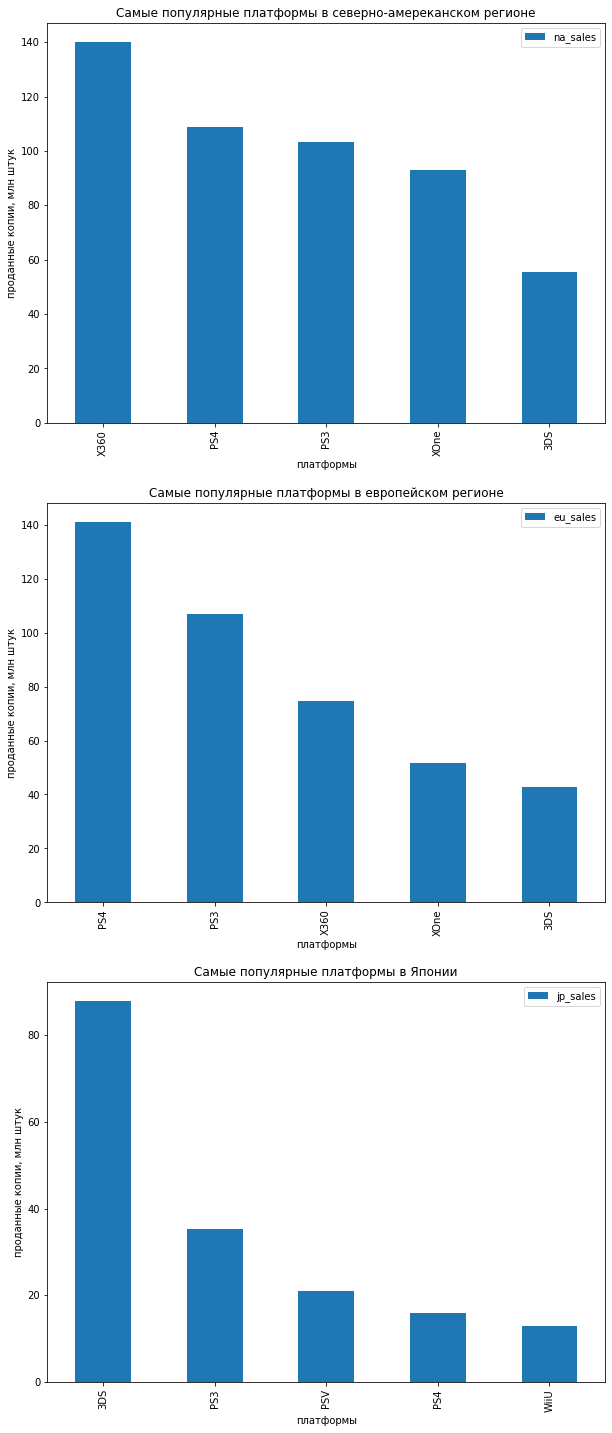

In [61]:
fig, ax = plt.subplots(nrows = 3, ncols =1, figsize=(10, 25), )

grouped = df_new.groupby(by='platform')

grouped.agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False)[0:5].plot(kind='bar',  ax=ax[0])

grouped.agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False)[0:5].plot(kind='bar',  ax=ax[1])

grouped.agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False)[0:5].plot(kind='bar',  ax=ax[2])


ax[0].set(
    title='Самые популярные платформы в северно-амереканском регионе', 
    ylabel='проданные копии, млн штук', 
    xlabel='платформы'
)

ax[1].set(
    title='Самые популярные платформы в европейском регионе', 
    ylabel='проданные копии, млн штук', 
    xlabel='платформы'
)

ax[2].set(
    title='Самые популярные платформы в Японии', 
    ylabel='проданные копии, млн штук', 
    xlabel='платформы'
)

plt.show()

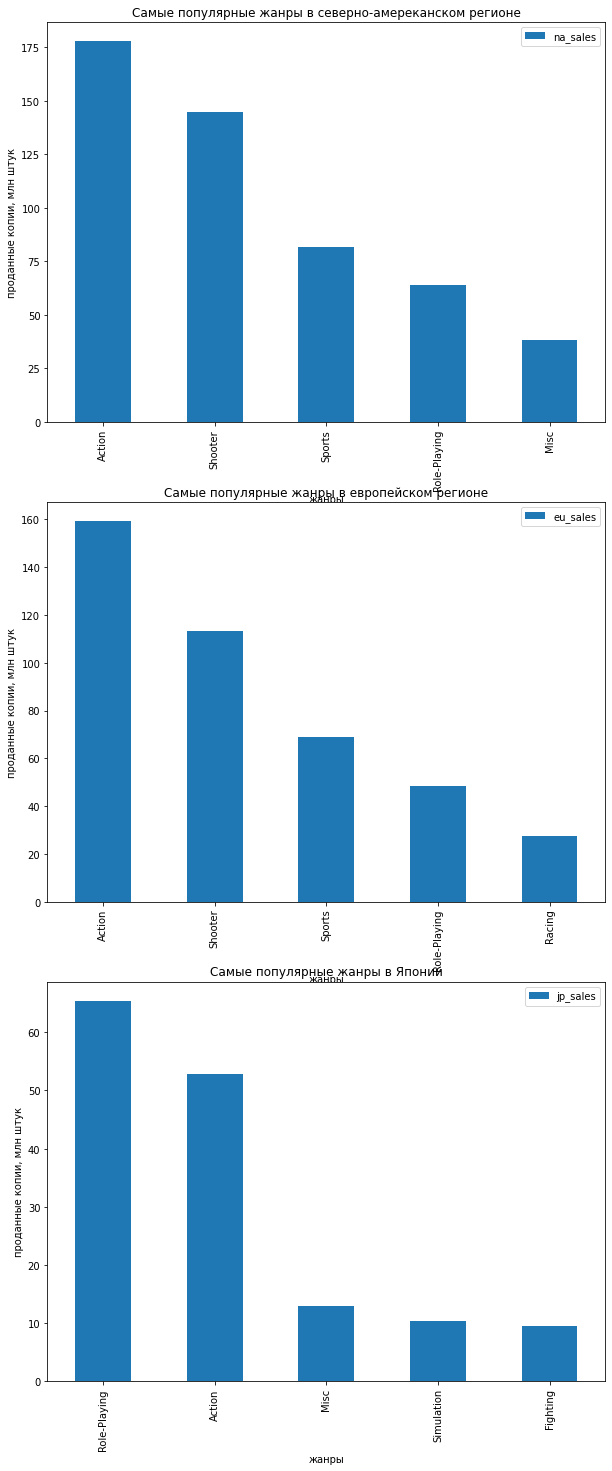

In [62]:
fig, ax = plt.subplots(nrows = 3, ncols =1, figsize=(10, 25), )

grouped = df_new.groupby(by='genre')

grouped.agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False)[0:5].plot(kind='bar',  ax=ax[0])

grouped.agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False)[0:5].plot(kind='bar',  ax=ax[1])

grouped.agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False)[0:5].plot(kind='bar',  ax=ax[2])


ax[0].set(
    title='Самые популярные жанры в северно-амереканском регионе', 
    ylabel='проданные копии, млн штук', 
    xlabel='жанры'
)

ax[1].set(
    title='Самые популярные жанры в европейском регионе', 
    ylabel='проданные копии, млн штук', 
    xlabel='жанры'
)

ax[2].set(
    title='Самые популярные жанры в Японии', 
    ylabel='проданные копии, млн штук', 
    xlabel='жанры'
)

plt.show()

Здесь все ожидаемо - популярные жанры походи в Европе и Америке, в Японии отличаются
С консолями все то же самое - они совпадают с точностью до порядка в Европе и Америке, в Японии отсутствует Xbox во всех вариациях, зато есть wii и psv.

Посмотрим как жанр влияет на выручку

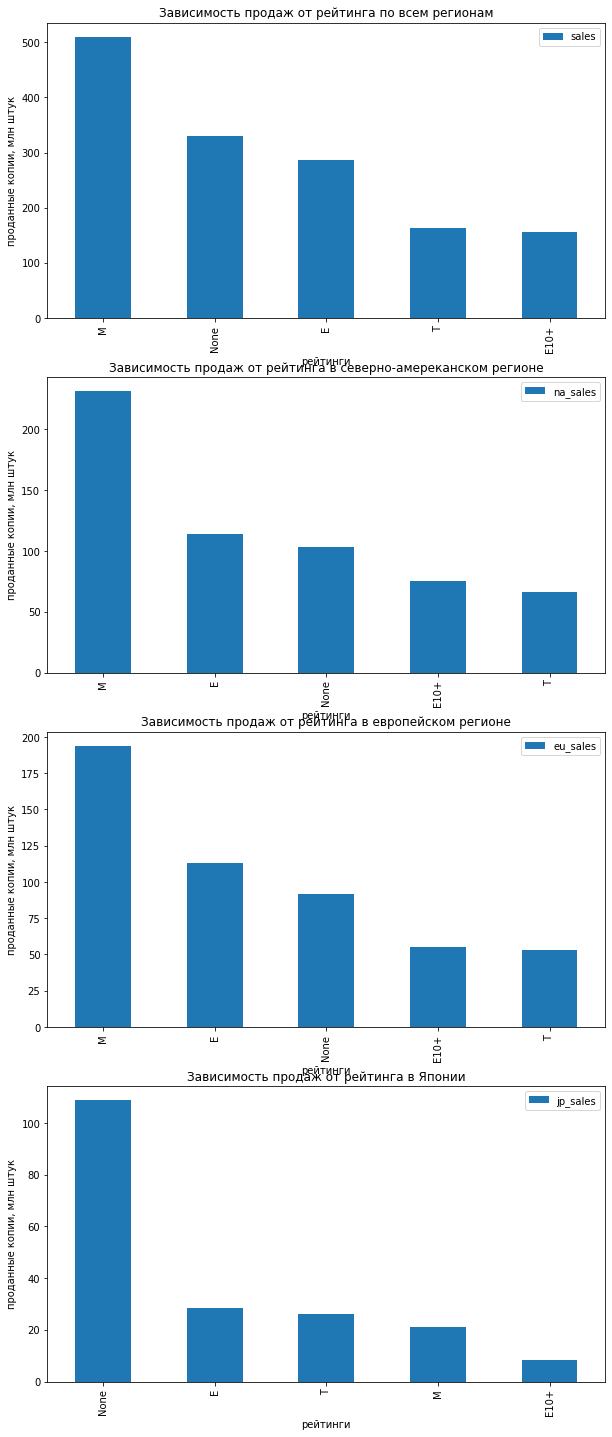

In [63]:
fig, ax = plt.subplots(nrows = 4, ncols =1, figsize=(10, 25), )

grouped = df_new.groupby(by='rating')


grouped.agg({'sales':'sum'}).sort_values(
    by='sales', ascending=False).plot(kind='bar',  ax=ax[0])

grouped.agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False).plot(kind='bar',  ax=ax[1])

grouped.agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False).plot(kind='bar',  ax=ax[2])

grouped.agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False).plot(kind='bar',  ax=ax[3])

ax[0].set(
    title='Зависимость продаж от рейтинга по всем регионам', 
    ylabel='проданные копии, млн штук', 
    xlabel='рейтинги'
)

ax[1].set(
    title='Зависимость продаж от рейтинга в северно-амереканском регионе', 
    ylabel='проданные копии, млн штук', 
    xlabel='рейтинги'
)

ax[2].set(
    title='Зависимость продаж от рейтинга в европейском регионе', 
    ylabel='проданные копии, млн штук', 
    xlabel='рейтинги'
)

ax[3].set(
    title='Зависимость продаж от рейтинга в Японии', 
    ylabel='проданные копии, млн штук', 
    xlabel='рейтинги'
)

plt.show()


После добавления игр без рейтинга картина поменялась)

Вспомним как устроен рейтинг ESRB:

Рейтинг ESRB:

- E - Everyone
- M - Mature
- T - Teen
- E10+ - Everyone 10+
- K-A - Everyone
- AO - Adults Only 18+
- EC - Early Childhood
- RP - Rating Pending


Во в Европе и Северной Америке всех регионах одна и та же картина с незначительными изменениями. Большинство игр проходит процедуру получения рейтинга ESRB.  Игры без ограничений или с незначительными ограничениями собирают большую кассу.  

В Японии напротив, большинство игр не проходит процедуру присвоения рейтинга. Оставшиеся игры - игры для подростков(`T`), без ограничений(`E`) и для взрослых (`M`)


Можно утверждать что в Европе и Северной Америке продажи делают игры с рейтингами `M` и `E`, или без рейтинга вовсе - это хорошо соотносится с нашим исследованием по жанрам - в этих регионах предпочитают экшены, шутеры RPG и спортивные игры. Колонка с рейтингом `M` набирается за счет умеренной жестокости в шутерах и экшене.

Ситуация в Японии более непонятна. Судя по предпочитаемым жанрам, взрослого контента должно быть больше. Скорее всего, в силу специфики рынка, производители просто не заморачиваются присвоением европейского рейтинга.



## Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотезы:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

Выберем p-value = 0.05

In [64]:
XOne = df_new[(df_new['platform'] == 'XOne') & (~df_new.user_score.isna())]['user_score']
PC = df_new[(df_new['platform'] == 'PC') & (~df_new.user_score.isna())]['user_score']

In [65]:
results = st.ttest_ind(XOne, PC)
results.pvalue

0.5747220188229722

Вывод:
Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотезы:
- H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
- H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [66]:
Action = df_new[(df_new['genre'] == 'Action') & (~df_new.user_score.isna())]['user_score']
Sports = df_new[(df_new['genre'] == 'Sports') & (~df_new.user_score.isna())]['user_score']

In [67]:
results = st.ttest_ind(Action, Sports)
results.pvalue

1.3390479552514847e-23

Вывод:
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Выводы

- Чем шире охват аудитории тем больше денег
- Рейтинг критиков не имеет значения, он просто не должен буть разгромным
- Комерческая успешность и рейтинг на популярных платформах не связан
- На непопулярных - связан

### Рекомендации

- выбор платформ
    - с точки зрения перспективных вложений стоит вкладываться в производство игр на консолях `PS3`, `X360` и  `PS4`, если важен комерческий успех в северо-американском и европейском регионах, и добавить `PS3`, `PSV` если важен успех в Японии. 
    - Казалось бы, eсли игру планируется выпускать по всему миру - то имеет смысл взять `PS3`, `X360`, `PS4` и `3DS` - этот набор щакрывает большую часть аудитории, но необходимо учесть крайне специфический игровой процесс и специфическое железо на приставке `3DS`. Скорее всего, игру расчитанную на классичесие косоли не удастся безболезненно (а значит без существенных затрат )прортировать на `3DS`.
- выбор жанра
    - для северо-американского и европейского региона можно порекомендовать экшен, спортивные игры, шутер, rpg - они популярны, у них хорошие медианные значения продаж и в этих жанрах присутствуют бестселлеры - следовательно может выстрелить и ваша игра
    - для японского региона имеет смысл делать rpg и экшен
- важность критики
    - критика для Вашего продукта не должна быть разгромной. Во всех остальных случаях она не повлияет на продажи.
- важность рейтинга
    - европейским и американским пользователям рейтинг важен, и он должен быть цивильным - без жестокости или с умеренным количеством жестокости. 
    - для японских покупателей напротив, рейтинг не окажет существенного влияния на продажи - более половины игр на этом рынке продаются без рейтинга
- рекомендации к датасету:
    - тщательней заполнять датасет
    - убрать `обещательные` рейтинги пользователей
    - добавить выручку в валюте региона, тогда анализ коммерческой успешности станет намного более точным
    
